In [1]:
import pandas as pd 

In [3]:
A = pd.read_csv(r'C:\Users\Vedika\Downloads\Admission_Predict.csv')

In [4]:
A.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
A.drop('Serial No.', axis = 1 ,inplace = True)

In [8]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [10]:
A.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [12]:
A['Chance of Admit '] = A['Chance of Admit '].apply(lambda x :1 if x>=0.50 else 0)

In [13]:
A['Chance of Admit '].value_counts()

1    367
0     33
Name: Chance of Admit , dtype: int64

In [24]:
x  = A.drop('Chance of Admit ',axis = 1)

In [26]:
y = A['Chance of Admit ']

In [28]:
#splitting into training and testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
     

(320, 7)
(80, 7)
(320,)
(80,)


In [32]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [33]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [34]:
from sklearn.tree import plot_tree

In [35]:
features = ['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']

In [36]:
features 

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR',
 'CGPA',
 'Research']

In [37]:
from sklearn.metrics import accuracy_score, classification_report

In [38]:
accuracy_score(y_test,y_pred)

0.9125

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.95      0.96      0.95        73

    accuracy                           0.91        80
   macro avg       0.72      0.69      0.71        80
weighted avg       0.91      0.91      0.91        80



[Text(444.92045454545456, 774.63, 'CGPA <= 7.665\ngini = 0.149\nsamples = 320\nvalue = [26, 294]\nclass = 1'),
 Text(135.27272727272728, 693.09, 'GRE Score <= 301.0\ngini = 0.461\nsamples = 25\nvalue = [16, 9]\nclass = 0'),
 Text(67.63636363636364, 611.55, 'CGPA <= 7.645\ngini = 0.142\nsamples = 13\nvalue = [12, 1]\nclass = 0'),
 Text(33.81818181818182, 530.01, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]\nclass = 0'),
 Text(101.45454545454547, 530.01, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(202.90909090909093, 611.55, 'CGPA <= 7.655\ngini = 0.444\nsamples = 12\nvalue = [4, 8]\nclass = 1'),
 Text(169.0909090909091, 530.01, 'GRE Score <= 314.5\ngini = 0.397\nsamples = 11\nvalue = [3, 8]\nclass = 1'),
 Text(101.45454545454547, 448.47, 'TOEFL Score <= 97.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]\nclass = 1'),
 Text(67.63636363636364, 366.93, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(135.27272727272728, 366.93, 'gini = 0.0\nsamples = 7\nvalue = [0, 

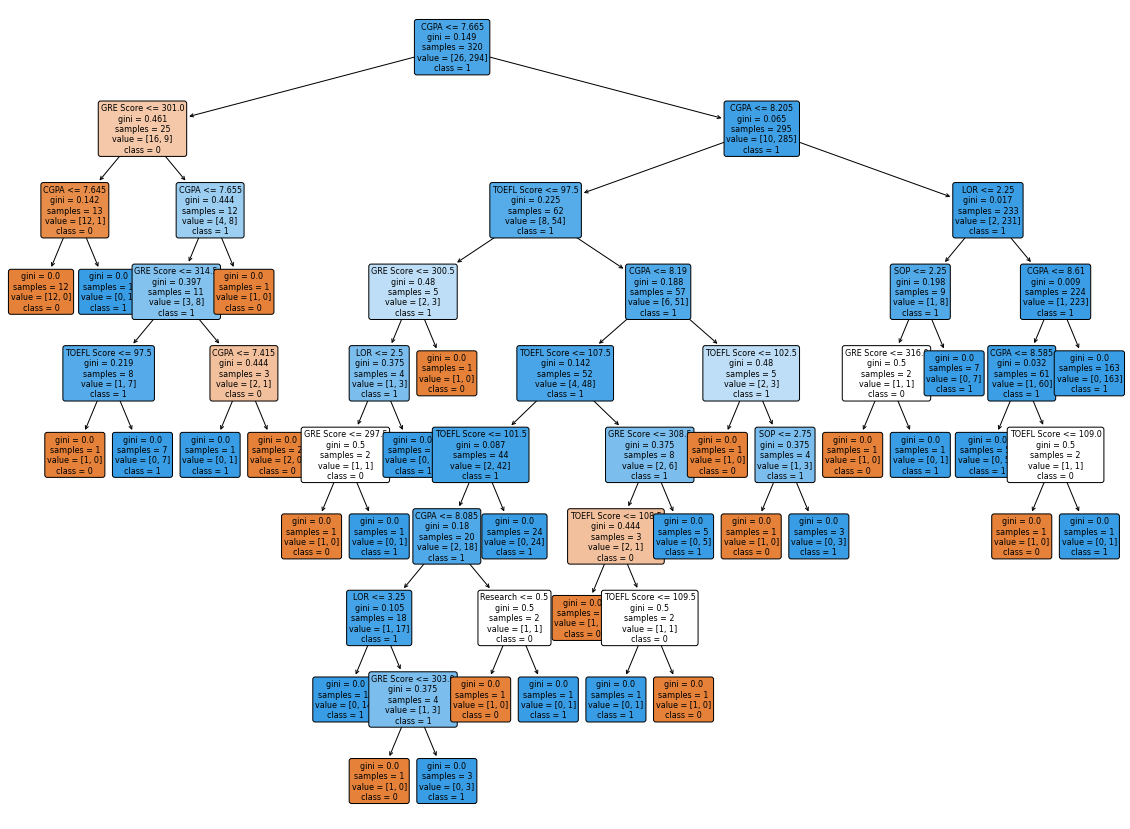

In [41]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,15))
plot_tree(clf,
         max_depth = 9 ,
         feature_names = features,
         class_names = ['0','1'],
         filled = True,
         rounded = True,
         fontsize= 8)